## Neural_Network_GasTurbines 

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.


Attribute Information:
The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout

In [2]:
from google.colab import files
upload = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [3]:
df=pd.read_csv("gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


## EDA

In [4]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [7]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
df.shape


(15039, 11)

## Visualization

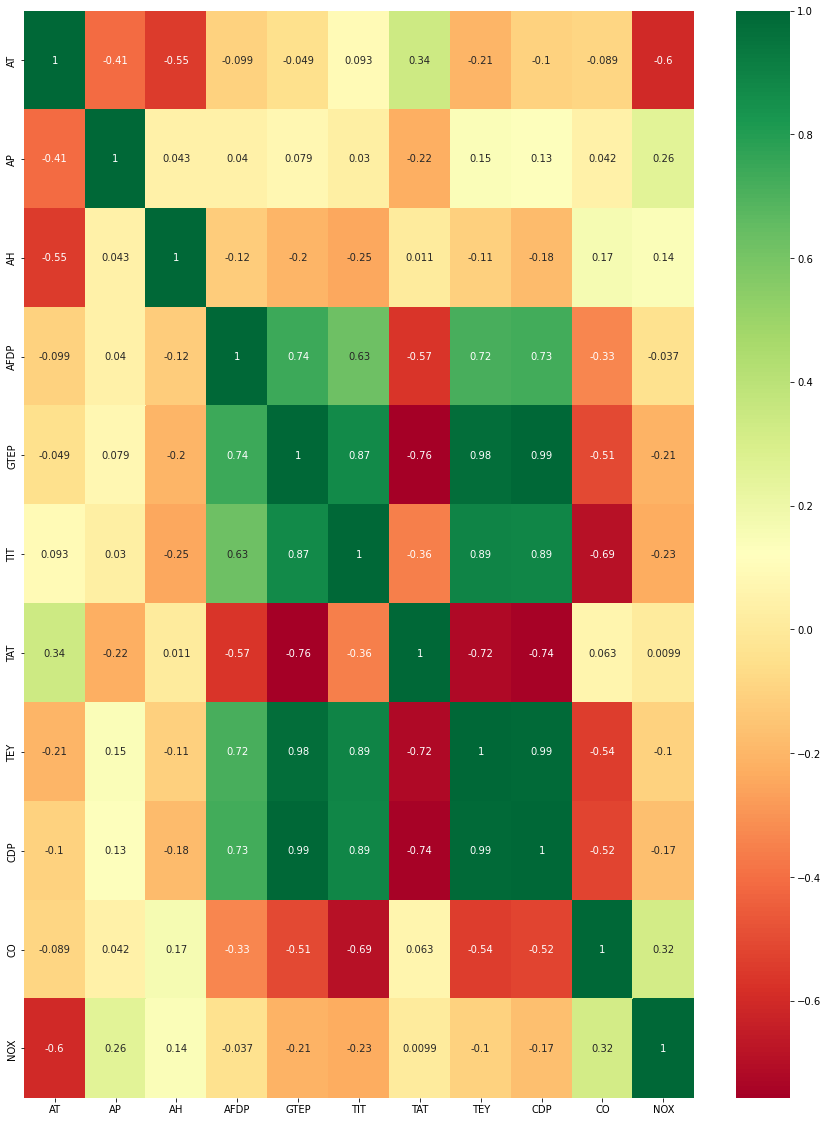

In [9]:
#Visualization:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,20))
#Plot Heat Map
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [10]:
gs=df.values
gs

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [13]:
# split into input (X) and output (Y) variables
X = gs[:,[0,1,2,3,4,5,6,8,9,10]]
Y = gs[:,-4]

In [14]:
X

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [15]:
Y

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

## Splitting data n test and train set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

## Standardization

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [19]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[0.35890393, 0.40602285, 0.91801706, ..., 0.34107329, 0.03084967,
        0.48475958],
       [0.55162803, 0.59086189, 0.72785444, ..., 0.42819611, 0.02833486,
        0.43366477],
       [0.69430373, 0.53478712, 0.55215014, ..., 0.14847583, 0.15186537,
        0.33822331],
       ...,
       [0.29923532, 0.48494289, 0.94876603, ..., 0.77514199, 0.00101504,
        0.41400706],
       [0.64399376, 0.35825545, 0.50904718, ..., 0.04705791, 0.10100297,
        0.36756316],
       [0.3486443 , 0.24340602, 0.81637941, ..., 0.34416412, 0.00787964,
        0.54170062]])

## Create model

In [20]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# add nodes for prediction
model.add(Dense(1))

In [21]:
model.compile(optimizer='rmsprop',loss='mse')

In [22]:
# Fit the model
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
353/353 [==============================] - 2s 1ms/step - loss: 12324.5498
Epoch 2/250
353/353 [==============================] - 1s 1ms/step - loss: 119.5826
Epoch 3/250
353/353 [==============================] - 1s 1ms/step - loss: 26.0743
Epoch 4/250
353/353 [==============================] - 0s 1ms/step - loss: 20.9642
Epoch 5/250
353/353 [==============================] - 0s 1ms/step - loss: 17.5350
Epoch 6/250
353/353 [==============================] - 0s 1ms/step - loss: 14.8249
Epoch 7/250
353/353 [==============================] - 0s 1ms/step - loss: 12.6863
Epoch 8/250
353/353 [==============================] - 0s 1ms/step - loss: 10.8513
Epoch 9/250
353/353 [==============================] - 1s 1ms/step - loss: 9.2743
Epoch 10/250
353/353 [==============================] - 1s 1ms/step - loss: 7.7957
Epoch 11/250
353/353 [==============================] - 0s 1ms/step - loss: 6.5504
Epoch 12/250
353/353 [==============================] - 0s 1ms/step - loss: 5.4587
E

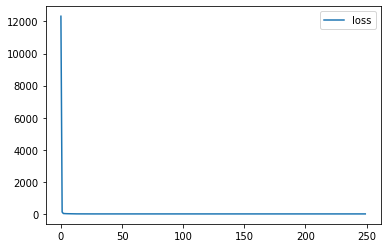

In [23]:
%matplotlib inline
import matplotlib as plot
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [24]:
pred = model.predict(x_test)
pred

118/118 [==============================] - 1s 2ms/step


array([[132.7916  ],
       [134.27821 ],
       [111.42467 ],
       ...,
       [160.83888 ],
       [104.810616],
       [133.17957 ]], dtype=float32)

In [25]:
pred = pred.ravel()

In [26]:
test_score = model.evaluate(x_test,y_test,verbose=0)
test_score

0.7061876654624939

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
mean_absolute_error(pred,y_test)

0.632586330170327

In [29]:
mean_squared_error(pred,y_test)

0.7061877735157519

In [30]:
import matplotlib.pyplot as plt

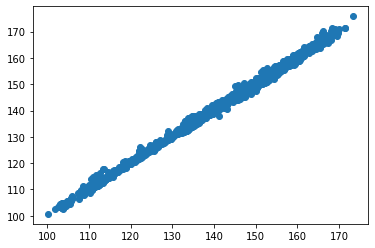

In [31]:
plt.scatter(y_test,pred)

## END 